# K Nearest Neighbor Classifier
### Introduction of Computer Vision
컴퓨터공학전공 2021112436 박고운

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

from KNN.kNearestNeighbor import KNearestNeighbor
from KNN.utils import load_cifar10_data, split_data, print_result

import matplotlib.pyplot as plt

Load data

In [2]:
data_dir = r'C:\Users\gony4\ComputerVision\KNN\CIFAR-10'
NUM_SAMPLES = 50000

X_full, y_full = load_cifar10_data(data_dir, num_samples=NUM_SAMPLES)

Loading up to 50000 samples


1. Train / Test

In [3]:
TRAIN_DATA_RATIO = 0.9

X_train, y_train, X_test, y_test = split_data(X_full, y_full, TRAIN_DATA_RATIO)

print(f"Total training samples: {len(X_train)}")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Total training samples: 45000
X_train: (45000, 3072), y_train: (45000,)
X_test: (5000, 3072), y_test: (5000,)


In [4]:
K = 5
metric = 'euclidean'

sk_knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
knn = KNearestNeighbor()

print(f"\nK : {int(K)}, Metirc : {metric}")

print("\n==== sklearn knn ====")
sk_knn.fit(X_train, y_train)
y_pred_sk = sk_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_sk)
prec = precision_score(y_test, y_pred_sk, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred_sk, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_sk, average='macro', zero_division=0)
print("Test results")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

print("\n==== custom code ====")
knn.train(X_train, y_train)
knn.compute_distance(X_test, metric)
y_pred = knn.predict(K)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
print("Test results")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")



K : 5, Metirc : euclidean

==== sklearn knn ====


C:\Users\gony4\miniconda3\envs\ComputerVision\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gony4\miniconda3\envs\ComputerVision\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\gony4\miniconda3\envs\ComputerVision\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\gony4\miniconda3\envs\ComputerVision\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\gony4\miniconda3\envs\ComputerVision\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _wina

Test results
Accuracy: 0.3418, Precision: 0.4378, Recall: 0.3402, F1-score: 0.3271

==== custom code ====
Test results
Accuracy: 0.3418, Precision: 0.4378, Recall: 0.3402, F1-score: 0.3271


2. Train / Validation / Test

In [5]:
TRAIN_DATA_RATIO = 0.8
VALIDATION_DATA_RATIO = 0.1
TEST_DATA_RATIO = 0.1

X_train, y_train, X_test, y_test = split_data(X_full, y_full, TRAIN_DATA_RATIO + VALIDATION_DATA_RATIO)
X_train, y_train, X_valid, y_valid = split_data(X_train, y_train, TRAIN_DATA_RATIO/(TRAIN_DATA_RATIO+VALIDATION_DATA_RATIO))

print(f"Total training samples: {len(X_train)}")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Total training samples: 40000
X_train: (40000, 3072), y_train: (40000,)
X_valid: (5000, 3072), y_valid: (5000,)
X_test: (5000, 3072), y_test: (5000,)


In [6]:
k_values = [3, 5, 7, 9, 11, 13, 15, 17]
metrics = ['manhattan', 'euclidean']

results = []

knn = KNearestNeighbor()
knn.train(X_train, y_train)

for metric in metrics:
    print(f"\n==== Testing on {metric} metric ====")
    knn.compute_distance(X_valid, metric=metric)

    for k in k_values:
        y_pred = knn.predict(k)

        acc = accuracy_score(y_valid, y_pred)
        prec = precision_score(y_valid, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_valid, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_valid, y_pred, average='macro', zero_division=0)
        print(f"K : {int(k)} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

        results.append({'k': k, 'metric': metric, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})


acc_best_result = max(results, key=lambda x: x['accuracy'])
prec_best_result = max(results, key=lambda x: x['precision'])
rec_best_result = max(results, key=lambda x: x['recall'])
f1_best_result = max(results, key=lambda x: x['f1'])

print("\n=== Best Result ===")
print("- At accuracy -")
print(f"K: {acc_best_result['k']}, Accuracy: {acc_best_result['metric']}")
print_result(acc_best_result)
print("- At precision -")
print(f"K: {prec_best_result['k']}, Accuracy: {prec_best_result['metric']}")
print_result(prec_best_result)
print("- At recall -")
print(f"K: {rec_best_result['k']}, Accuracy: {rec_best_result['metric']}")
print_result(rec_best_result)
print("- At f1- ")
print(f"K: {f1_best_result['k']}, Accuracy: {f1_best_result['metric']}")
print_result(f1_best_result)


==== Testing on manhattan metric ====
K : 3 - Accuracy: 0.3558, Precision: 0.4483, Recall: 0.3578, F1-score: 0.3498
K : 5 - Accuracy: 0.3616, Precision: 0.4445, Recall: 0.3641, F1-score: 0.3546
K : 7 - Accuracy: 0.3590, Precision: 0.4519, Recall: 0.3619, F1-score: 0.3527
K : 9 - Accuracy: 0.3582, Precision: 0.4434, Recall: 0.3612, F1-score: 0.3500
K : 11 - Accuracy: 0.3522, Precision: 0.4395, Recall: 0.3552, F1-score: 0.3429
K : 13 - Accuracy: 0.3530, Precision: 0.4420, Recall: 0.3563, F1-score: 0.3443
K : 15 - Accuracy: 0.3520, Precision: 0.4449, Recall: 0.3555, F1-score: 0.3436
K : 17 - Accuracy: 0.3478, Precision: 0.4375, Recall: 0.3514, F1-score: 0.3375

==== Testing on euclidean metric ====
K : 3 - Accuracy: 0.3288, Precision: 0.4398, Recall: 0.3309, F1-score: 0.3159
K : 5 - Accuracy: 0.3286, Precision: 0.4276, Recall: 0.3316, F1-score: 0.3140
K : 7 - Accuracy: 0.3280, Precision: 0.4452, Recall: 0.3310, F1-score: 0.3131
K : 9 - Accuracy: 0.3230, Precision: 0.4322, Recall: 0.3263,

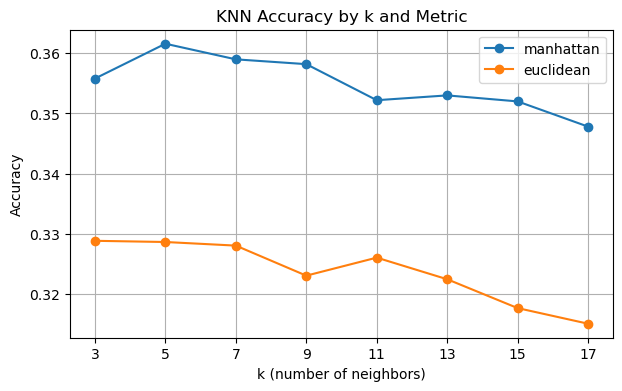

In [7]:
plt.figure(figsize=(7, 4))

for metric in metrics:
    ks = [r['k'] for r in results if r['metric'] == metric]
    accs = [r['accuracy'] for r in results if r['metric'] == metric]

    plt.plot(ks, accs, marker='o', label=metric)

plt.title('KNN Accuracy by k and Metric')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

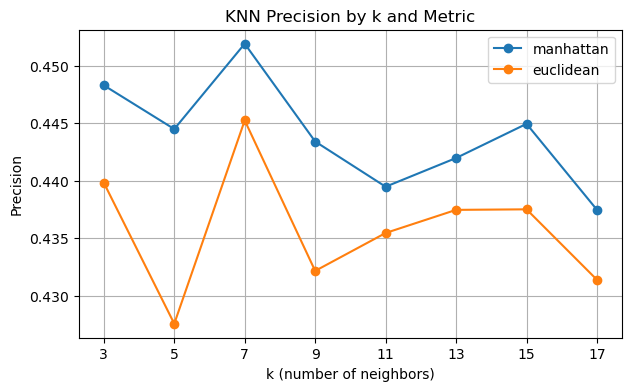

In [8]:
plt.figure(figsize=(7, 4))

for metric in metrics:
    ks = [r['k'] for r in results if r['metric'] == metric]
    precs = [r['precision'] for r in results if r['metric'] == metric]

    plt.plot(ks, precs, marker='o', label=metric)

plt.title('KNN Precision by k and Metric')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Precision')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

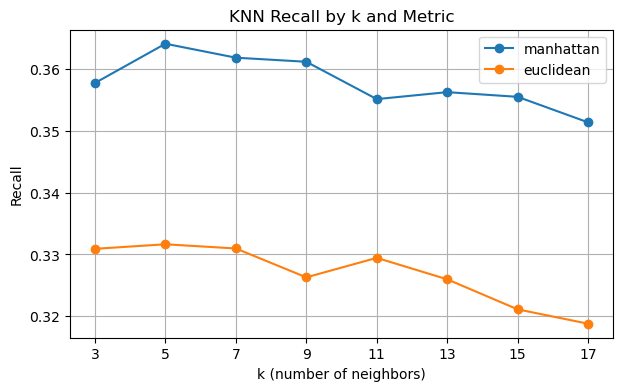

In [9]:
plt.figure(figsize=(7, 4))

for metric in metrics:
    ks = [r['k'] for r in results if r['metric'] == metric]
    rec = [r['recall'] for r in results if r['metric'] == metric]

    plt.plot(ks, rec, marker='o', label=metric)

plt.title('KNN Recall by k and Metric')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Recall')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

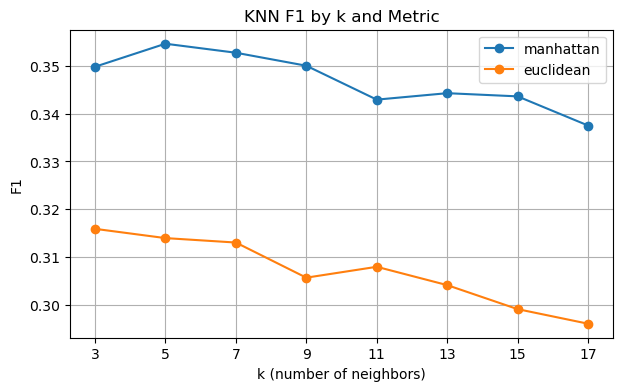

In [10]:
plt.figure(figsize=(7, 4))

for metric in metrics:
    ks = [r['k'] for r in results if r['metric'] == metric]
    f1 = [r['f1'] for r in results if r['metric'] == metric]

    plt.plot(ks, f1, marker='o', label=metric)

plt.title('KNN F1 by k and Metric')
plt.xlabel('k (number of neighbors)')
plt.ylabel('F1')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [11]:
print(f"==== Best Accuracy Case Test by test data ====")
print(f"K : {int(acc_best_result['k'])}, Metirc : {acc_best_result['metric']}")
print(f"Accuracy: {acc_best_result['accuracy']:.4f}, Precision: {acc_best_result['precision']:.4f}, Recall: {acc_best_result['recall']:.4f}, f1: {acc_best_result['f1']:.4f}\n")

knn.compute_distance(X_test, metric=acc_best_result['metric'])
y_pred = knn.predict(acc_best_result['k'])

print("==== result ====")
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

==== Best Accuracy Case Test by test data ====
K : 5, Metirc : manhattan
Accuracy: 0.3616, Precision: 0.4445, Recall: 0.3641, f1: 0.3546

==== result ====
Accuracy: 0.3620, Precision: 0.4436, Recall: 0.3630, F1-score: 0.3555


3. 5-fold

In [12]:
TRAIN_DATA_RATIO = 0.9

X_train, y_train, X_test, y_test = split_data(X_full, y_full, TRAIN_DATA_RATIO)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
k_values = [3, 5, 7, 9, 11, 13, 15, 17]
metrics = ['euclidean', 'manhattan']

cv_results = {metric: {k: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
                       for k in k_values}
              for metric in metrics}

for metric in metrics:
    print(f"\n=== Metric: {metric} ===")
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"Fold {fold + 1}")
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        knn = KNearestNeighbor()
        knn.train(X_tr, y_tr)
        knn.compute_distance(X_val, metric=metric)

        for k in k_values:
            y_pred = knn.predict(k=k)
            cv_results[metric][k]['accuracy'].append(accuracy_score(y_val, y_pred))
            cv_results[metric][k]['precision'].append(precision_score(y_val, y_pred, average='macro', zero_division=0))
            cv_results[metric][k]['recall'].append(recall_score(y_val, y_pred, average='macro', zero_division=0))
            cv_results[metric][k]['f1'].append(f1_score(y_val, y_pred, average='macro', zero_division=0))

cv_summary = {metric: {} for metric in metrics}
for metric in metrics:
    for k in k_values:
        acc_mean = np.mean(cv_results[metric][k]['accuracy'])
        acc_std = np.std(cv_results[metric][k]['accuracy'])
        cv_summary[metric][k] = {'accuracy_mean': acc_mean, 'accuracy_std': acc_std}



=== Metric: euclidean ===
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

=== Metric: manhattan ===
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


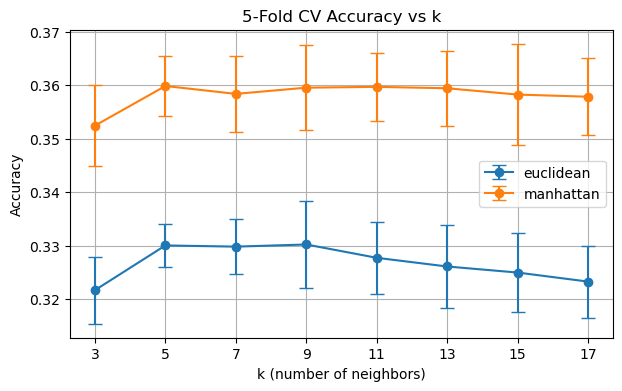

In [14]:
plt.figure(figsize=(7, 4))
for metric in metrics:
    means = [cv_summary[metric][k]['accuracy_mean'] for k in k_values]
    stds = [cv_summary[metric][k]['accuracy_std'] for k in k_values]
    plt.errorbar(k_values, means, yerr=stds, fmt='-o', capsize=5, label=metric)

plt.title('5-Fold CV Accuracy vs k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()